In [17]:
import logging
import numpy as np

from matplotlib import pyplot as plt
from tqdm.auto import tqdm
from dataclasses import dataclass
from pathlib import Path
from tabulate import tabulate

from scalebar import utils
from scalebar.core.estimation import Result
from scalebar.core.size import Size


In [18]:
logging.basicConfig(level=logging.INFO)

In [19]:
BLACK = 0
GRAY = 127
WHITE = 255

@dataclass
class Args:
    image_path: str

    size: Size = Size.MEDIUM

In [20]:
def imshow(ims):

    if len(ims) <= 3:
        nrows, ncols = 1, len(ims)
    else:
        nrows = int(np.ceil(np.sqrt(len(ims))))
        ncols = int(np.ceil( len(ims) / nrows))

    fig, axs = plt.subplots(ncols=ncols, nrows=nrows,figsize=(16,9), squeeze=False)
    for i, (title, im, cmap) in enumerate(ims):
        ax = axs[np.unravel_index(i, axs.shape)]

        if isinstance(im, (list, tuple)):
            alpha = 1 / len(im)
            for _im, _cm in zip(im, cmap):
                ax.imshow(_im, cmap=_cm, alpha=alpha)
        else:
            ax.imshow(im, cmap=cmap)
        ax.set_title(title)

    return fig, axs

In [21]:
def main(args: Args):

    res = Result.new(args.image_path, scalebar_size=args.size)
    images = res.images
    ROI = utils.hide_non_roi(images.binary, res.scalebar_size.value / 2, 127)


    logging.info(f"Computed sizes: {res.images.structure_sizes}")
    logging.info(f"Used checkboard template size: {res.template.shape}")

    logging.info(f"Estimated Pixel per square: {res.px_per_square}")
    logging.info(f"Used size per square: {res.size_per_square:.2f}")
    logging.info(f"Result: {res.scale:.2f} px/mm | Image size: {res.image_size} | ")

    imshow([
        ("Original", images.original, None),
        ("B/W image", images.gray, plt.cm.gray),
        ("B/W image equalized", images.equalized, plt.cm.gray),
    ])

    imshow([
        ("Binarized", images.binary, plt.cm.gray),
        ("ROI to be masked", ROI, plt.cm.gray),
        ("Masked", images.masked, plt.cm.gray),
    ])


    # match, template = match_scalebar(bin_im_masked, template_size=temp_size)
    # x, y, w, h = find_scalebar(match, enlarge=temp_size)

    scalebar_crop = res.position.crop(images.equalized)

    fig, axs = imshow([
        ("Template Matches", (
            images.binary,
            res.match), (plt.cm.gray, plt.cm.viridis)),
        (f"Scalebar | {res.scale} px/mm", scalebar_crop, plt.cm.gray),
    ])

    ax = axs[np.unravel_index(1, axs.shape)]
    ys, xs = res.distances.corners.transpose(1, 0)
    ax.scatter(xs, ys, marker=".", c="red")


    plt.show()
    plt.close()

    return res


{'Scalebartest_1zu1.jpg': 168.0, 'Scalebartest_1zu1-25.jpg': 134.3, 'Scalebartest_1zu1_5.jpg': 113.7, 'Scalebartest_1zu1_75.jpg': 97.1, 'Scalebartest_1zu2.jpg': 86.7, 'Scalebartest_1zu2_5.jpg': 67.7}


  0%|          | 0/6 [00:00<?, ?it/s]

Scalebartest_1zu2.jpg 86.7


INFO:root:Computed sizes: StructureSizes(size=8, kernel_size=17, kernel_shape=(17, 17), template_size=40)
INFO:root:Used checkboard template size: (80, 80)
INFO:root:Estimated Pixel per square: 87.0
INFO:root:Used size per square: 1.00
INFO:root:Result: 87.00 px/mm | Image size: (6000, 4000) | 


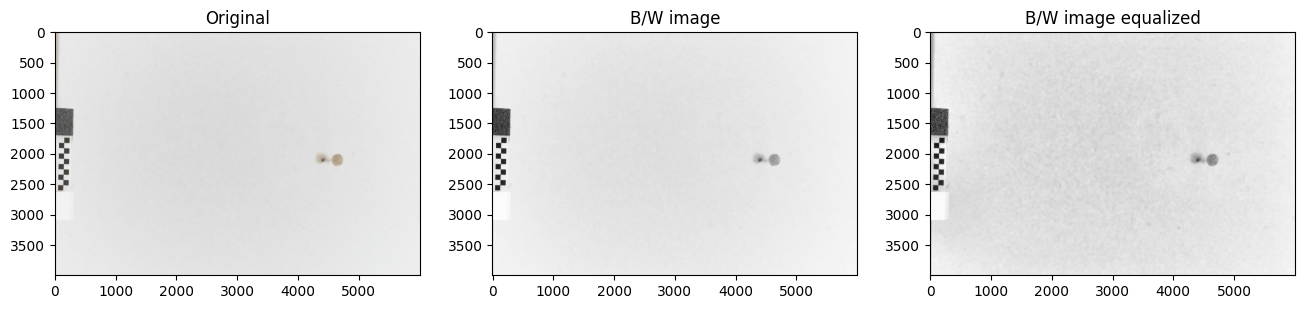

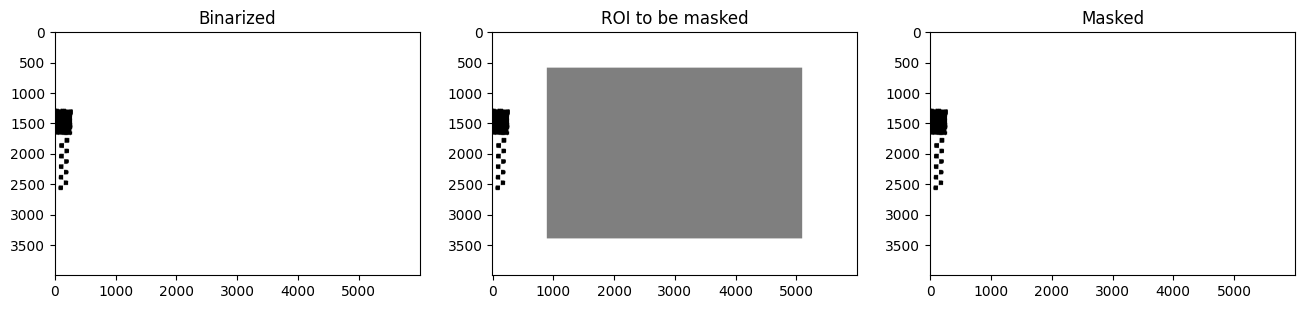

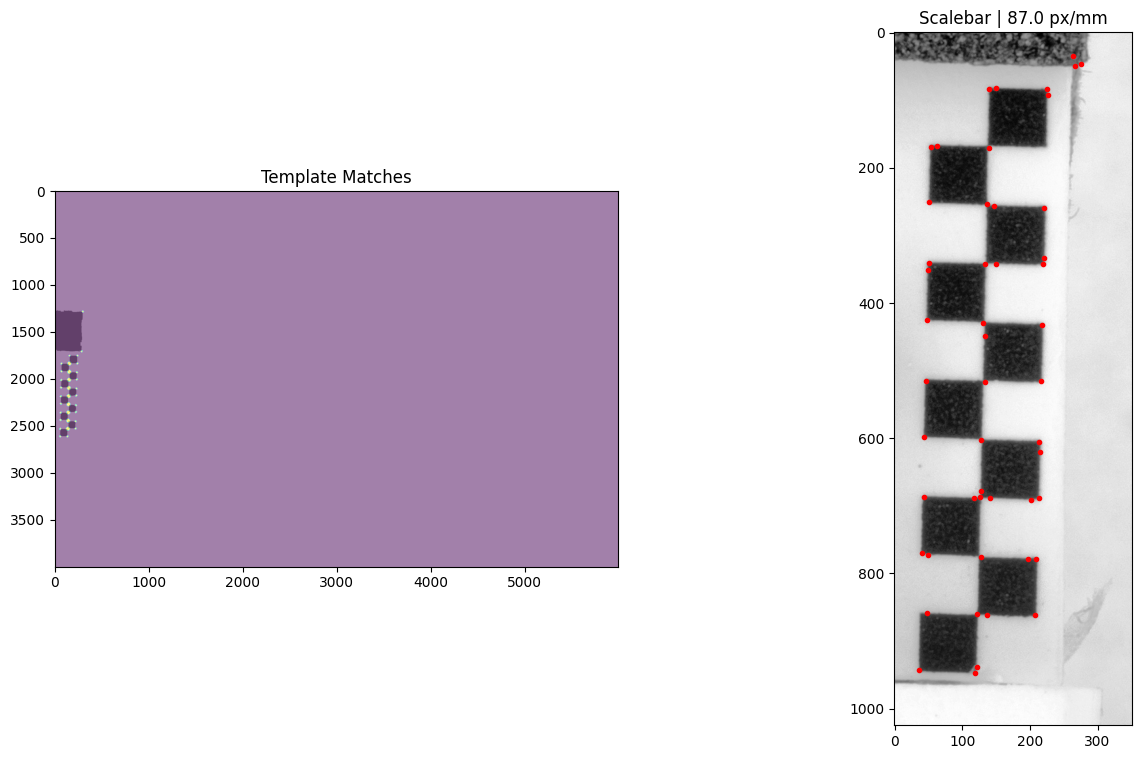

Scalebartest_1zu1-25.jpg 134.3


INFO:root:Computed sizes: StructureSizes(size=8, kernel_size=17, kernel_shape=(17, 17), template_size=40)
INFO:root:Used checkboard template size: (80, 80)
INFO:root:Estimated Pixel per square: 135.0
INFO:root:Used size per square: 1.00
INFO:root:Result: 135.00 px/mm | Image size: (6000, 4000) | 


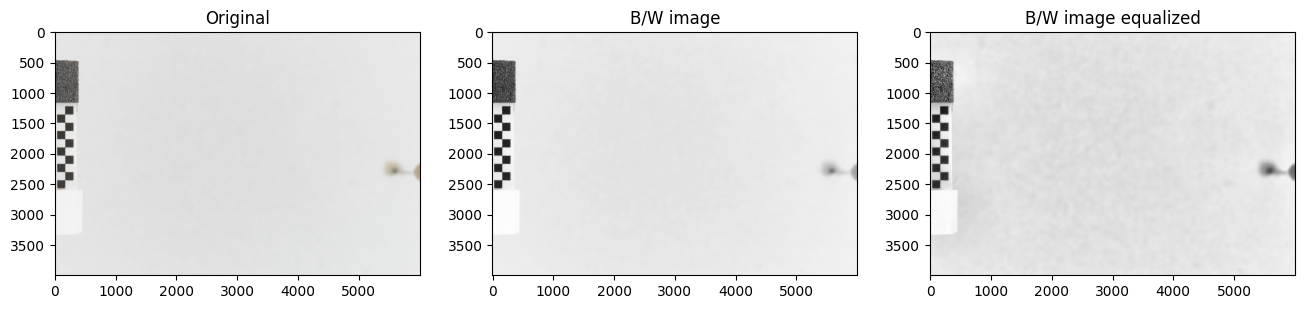

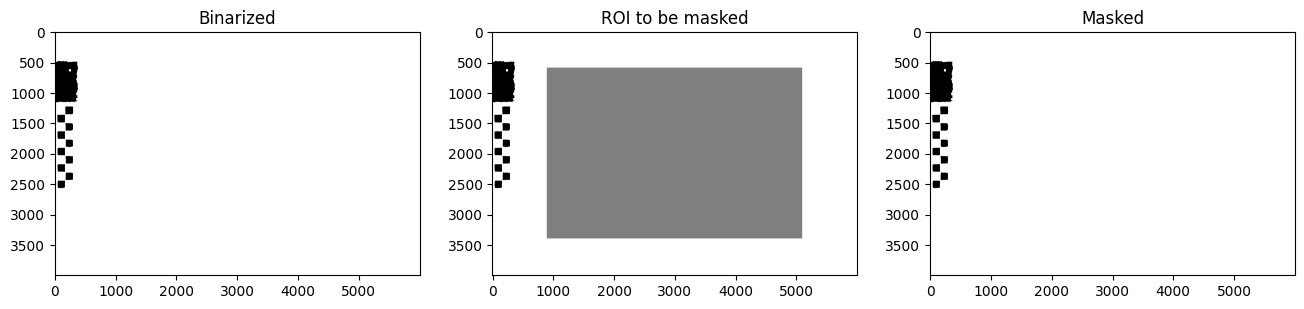

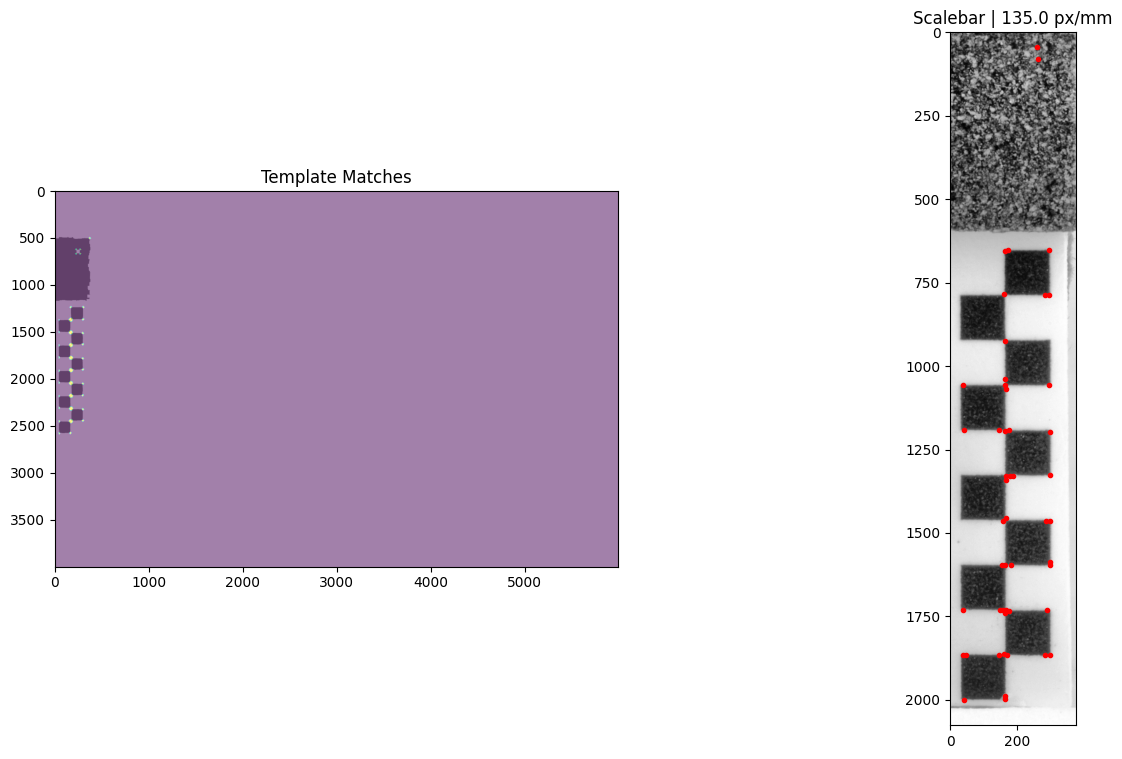

Scalebartest_1zu1_5.jpg 113.7


INFO:root:Computed sizes: StructureSizes(size=8, kernel_size=17, kernel_shape=(17, 17), template_size=40)
INFO:root:Used checkboard template size: (80, 80)
INFO:root:Estimated Pixel per square: 114.0
INFO:root:Used size per square: 1.00
INFO:root:Result: 114.00 px/mm | Image size: (6000, 4000) | 


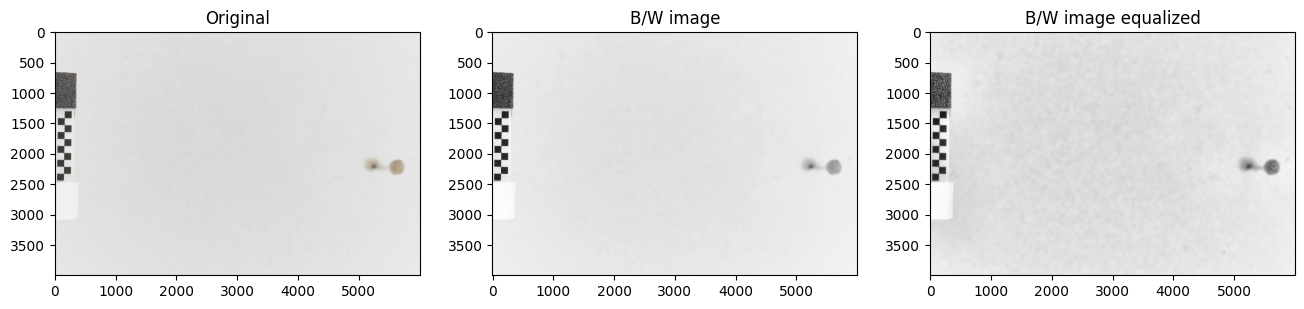

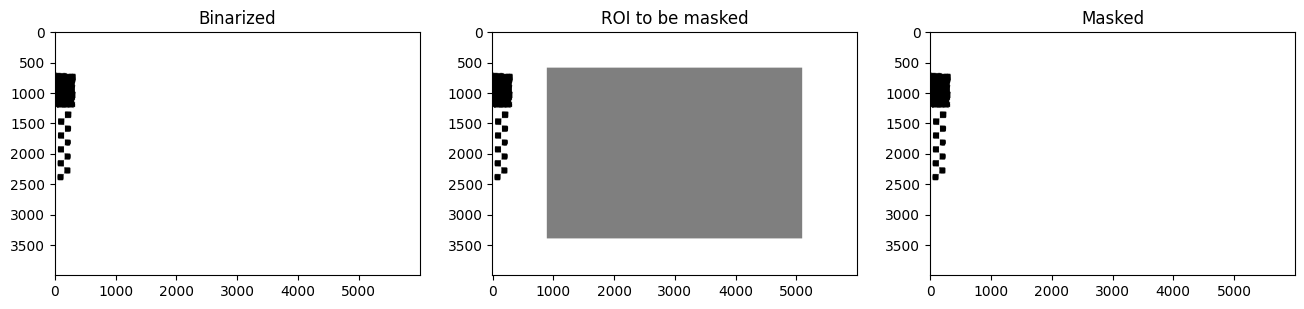

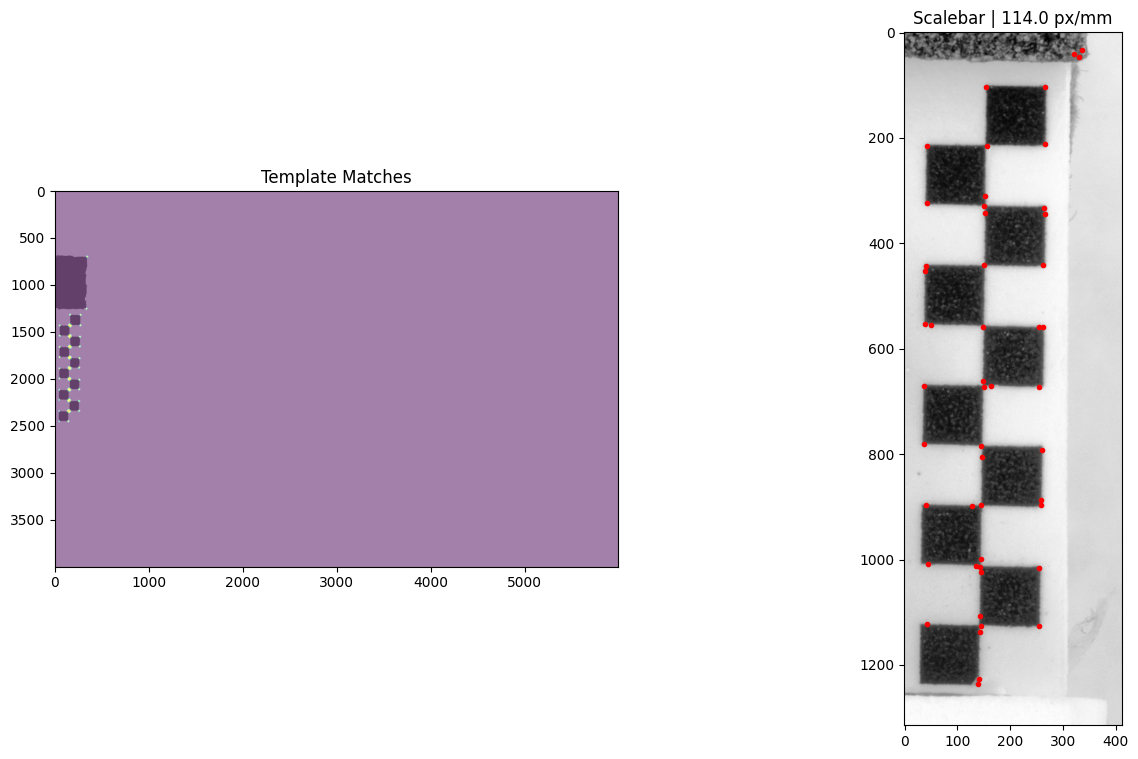

Scalebartest_1zu2_5.jpg 67.7


INFO:root:Computed sizes: StructureSizes(size=8, kernel_size=17, kernel_shape=(17, 17), template_size=40)
INFO:root:Used checkboard template size: (80, 80)
INFO:root:Estimated Pixel per square: 68.0
INFO:root:Used size per square: 1.00
INFO:root:Result: 68.00 px/mm | Image size: (6000, 4000) | 


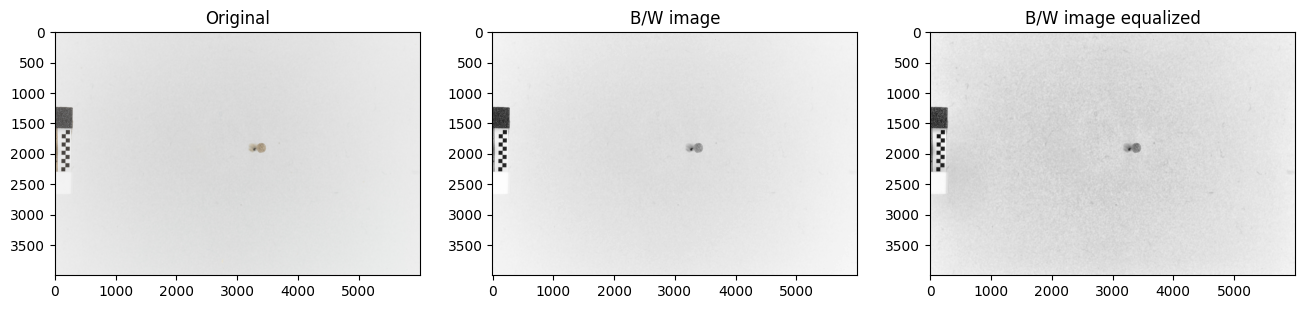

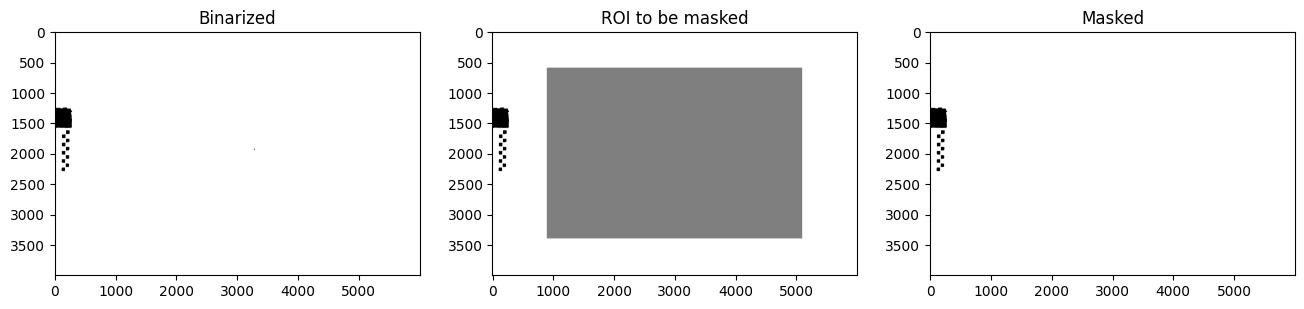

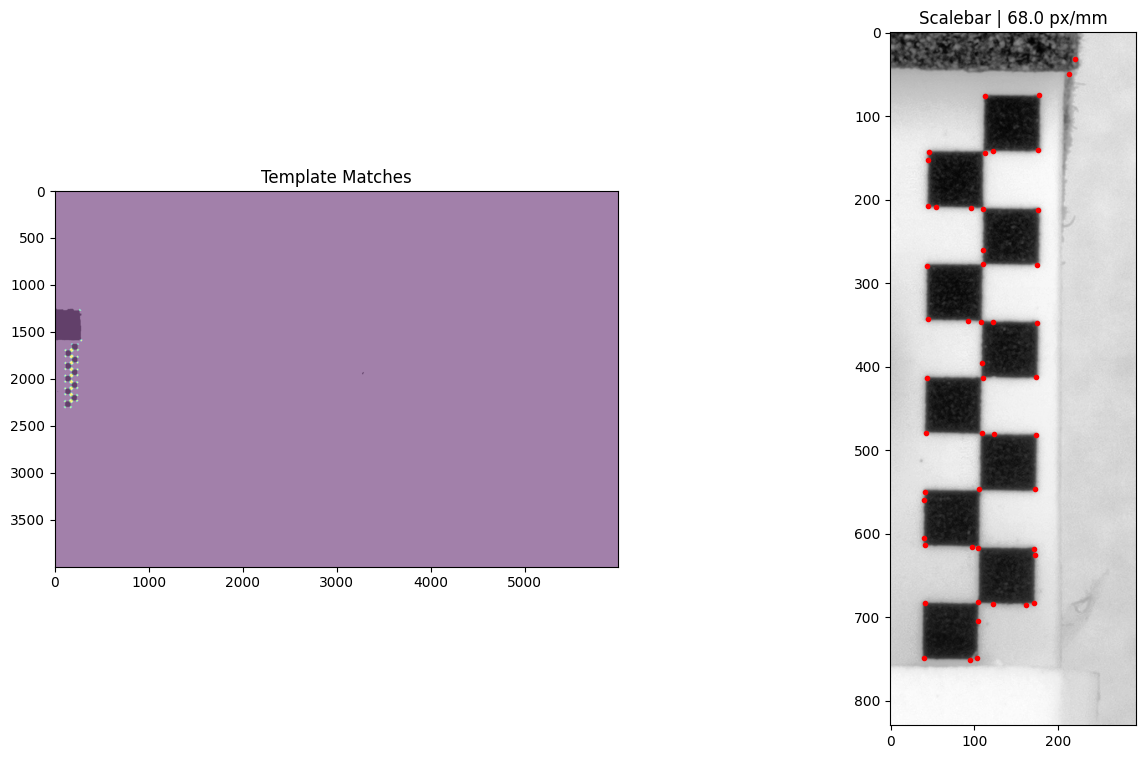

Scalebartest_1zu1.jpg 168.0


INFO:root:Computed sizes: StructureSizes(size=8, kernel_size=17, kernel_shape=(17, 17), template_size=40)
INFO:root:Used checkboard template size: (80, 80)
INFO:root:Estimated Pixel per square: 167.0
INFO:root:Used size per square: 1.00
INFO:root:Result: 167.00 px/mm | Image size: (6000, 4000) | 


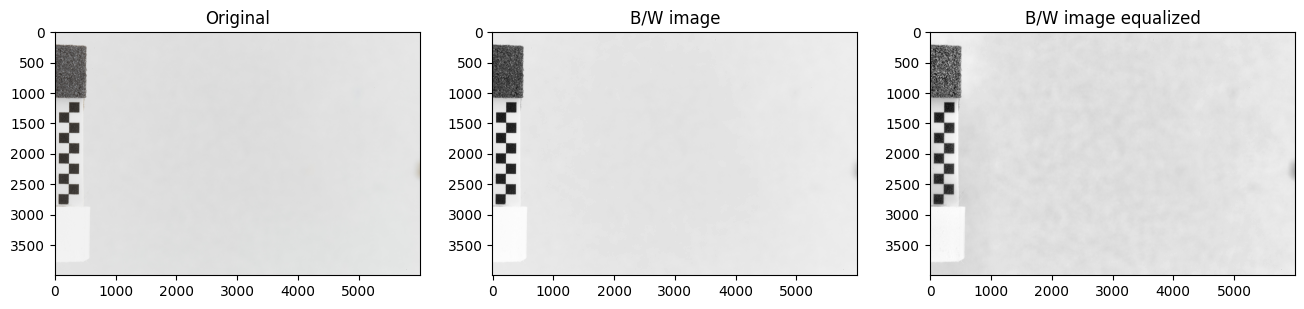

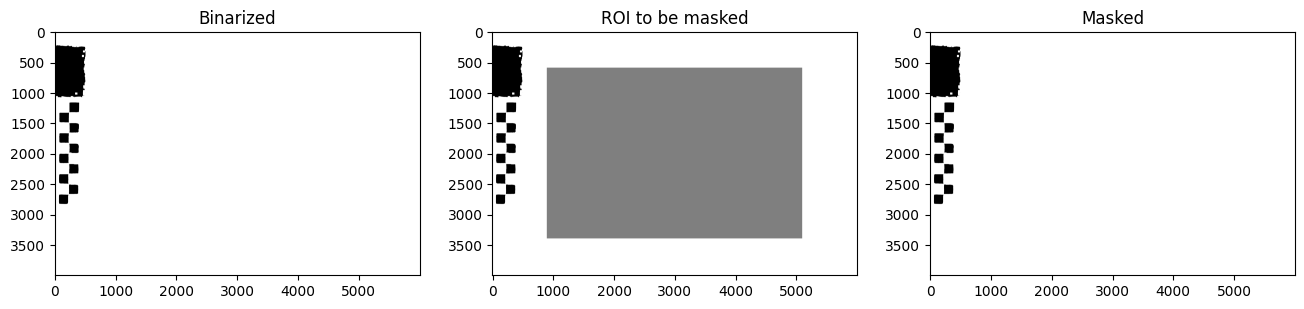

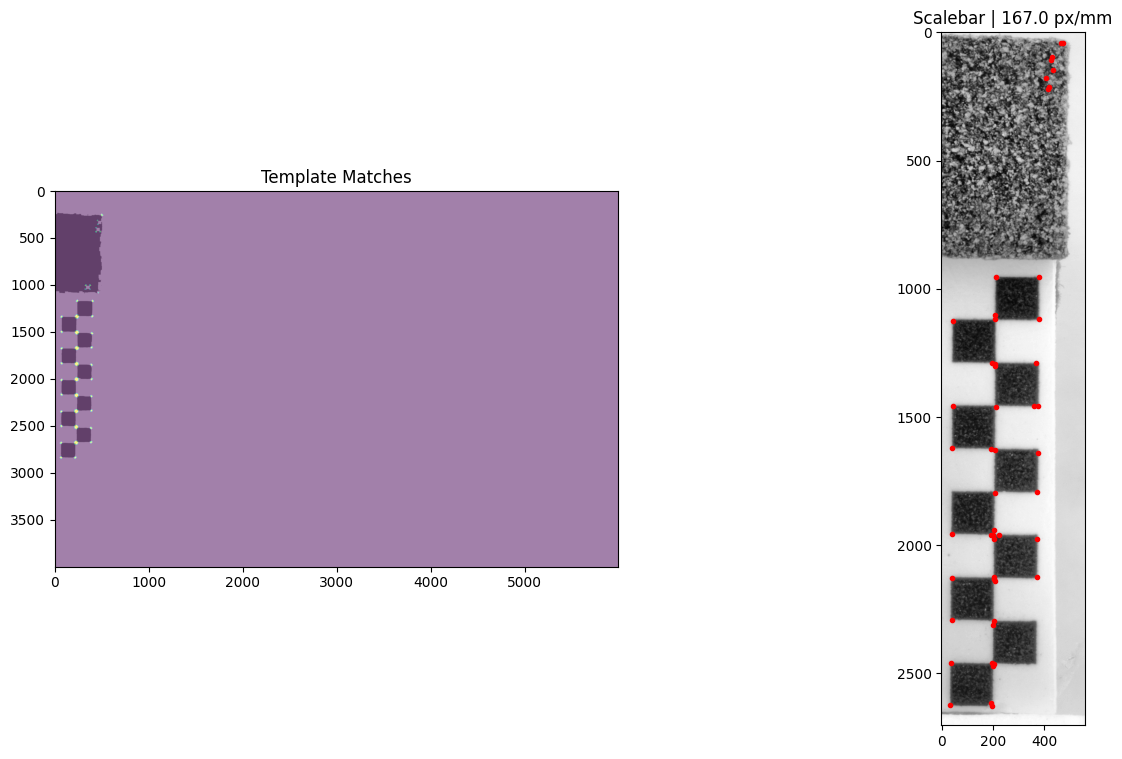

Scalebartest_1zu1_75.jpg 97.1


INFO:root:Computed sizes: StructureSizes(size=8, kernel_size=17, kernel_shape=(17, 17), template_size=40)
INFO:root:Used checkboard template size: (80, 80)
INFO:root:Estimated Pixel per square: 97.0
INFO:root:Used size per square: 1.00
INFO:root:Result: 97.00 px/mm | Image size: (6000, 4000) | 


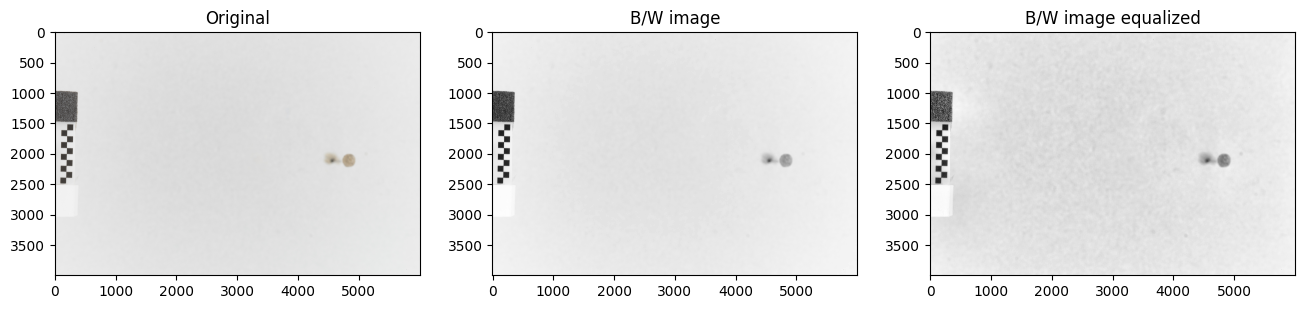

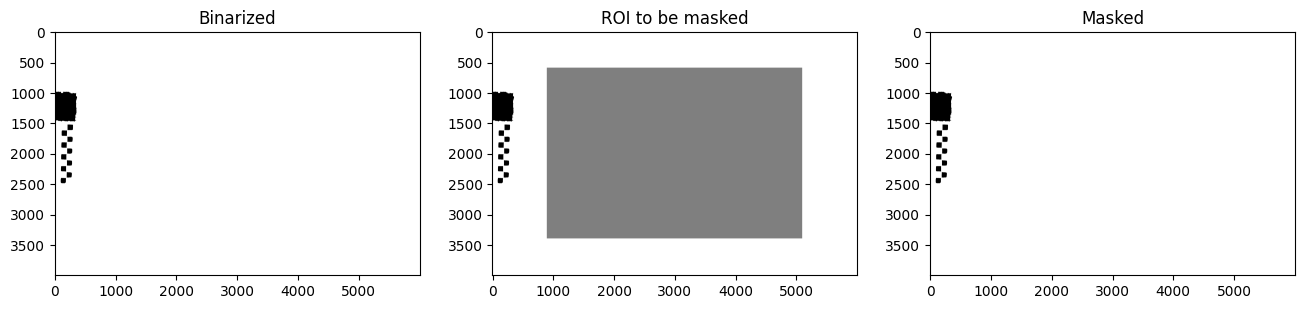

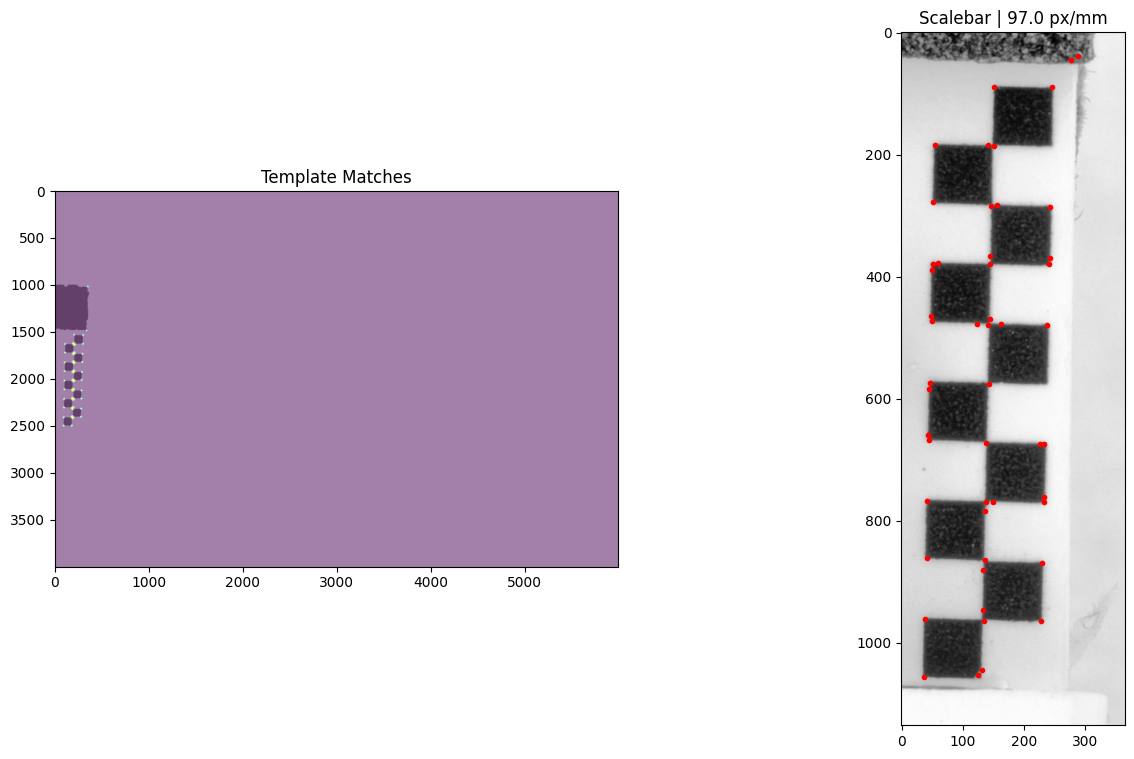

╒══════════════════════════╤══════════════════╤═════════════════════╤════════════╕
│ Filename                 │   Estimated size │   Ground truth size │        MSE │
╞══════════════════════════╪══════════════════╪═════════════════════╪════════════╡
│ Scalebartest_1zu2.jpg    │               87 │                86.7 │ 0.0900018  │
├──────────────────────────┼──────────────────┼─────────────────────┼────────────┤
│ Scalebartest_1zu1-25.jpg │              135 │               134.3 │ 0.489996   │
├──────────────────────────┼──────────────────┼─────────────────────┼────────────┤
│ Scalebartest_1zu1_5.jpg  │              114 │               113.7 │ 0.0900018  │
├──────────────────────────┼──────────────────┼─────────────────────┼────────────┤
│ Scalebartest_1zu2_5.jpg  │               68 │                67.7 │ 0.0900018  │
├──────────────────────────┼──────────────────┼─────────────────────┼────────────┤
│ Scalebartest_1zu1.jpg    │              167 │               168   │ 1          │
├───

In [24]:

ims = [
    # "../examples/Pe-Geo-5149u.jpg",
    # "../examples/Pe-Geo-5149u-big.jpg",
    # ("/local/dkorsch/Data/datasets/moths/jena_moths/2023-03/uncropped/images/2021/2021-06-11_Strommast-Hahnengrund/2021-06-11_9492.jpg",
    #     Size.SMALL),
    # "../examples/20240530_175508.jpg",
    # "../examples/20240530_174728.jpg",
    # "../examples/20240531_141321.jpg",
]
DATA_ROOT = Path.home() / "Data/datasets/mothseg/6_Masstabsbilder/"
ims += list((DATA_ROOT).glob("*.jpg"))

sizes = dict(np.loadtxt(DATA_ROOT / "sizes.txt", dtype=[("fname", "U225"), ("px_per_mm", np.float32)], delimiter=" "))

print(dict(sizes))
rows = []

for im in tqdm(ims):
    name = Path(im).name
    print(name, sizes.get(name, None))
    if isinstance(im, tuple):
        im, size = im
        args = Args(im, size=size)
    else:
        args = Args(im)

    res = main(args)

    rows.append((name, res.scale, sizes.get(name, None), (res.scale - sizes.get(name, 0))**2))

print(tabulate(rows, headers=["Filename", "Estimated size", "Ground truth size", "MSE"], tablefmt="fancy_grid"))

In [8]:
from scalebar.core.position import Position

{pos.name.lower(): pos for pos in Position}

{'top_right': <Position.top_right: 1>,
 'bottom_right': <Position.bottom_right: 2>,
 'top_left': <Position.top_left: 3>,
 'bottom_left': <Position.bottom_left: 4>,
 'top': <Position.top: 5>,
 'bottom': <Position.bottom: 6>,
 'left': <Position.left: 7>,
 'right': <Position.right: 8>}